In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('Bigmart (1).csv')
test = pd.read_csv('bigmarttest.csv')


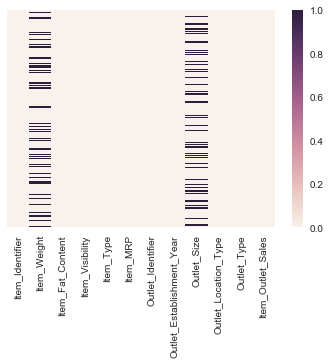

In [3]:
sns.heatmap(train.isnull(),cbar=True,yticklabels=False)

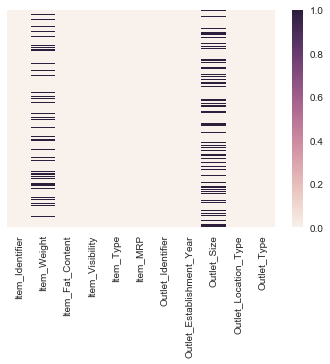

In [4]:
sns.heatmap(test.isnull(),cbar=True,yticklabels=False)

In [5]:
def os(cols):
    Outlet_Size = cols[0]
    Outlet_Type = cols[1]
    
    if pd.isnull(Outlet_Size):
        if(Outlet_Type == "Grocery Store" or Outlet_Type == "Supermarket Type1"):
            return "Small"
        else:
            return "Medium"
    else:
        return Outlet_Size
        

In [6]:
train["Outlet_Size"]= train[['Outlet_Size','Outlet_Type']].apply(os,axis=1)
test["Outlet_Size"]= test[['Outlet_Size','Outlet_Type']].apply(os,axis=1)

In [7]:
train["Item_Weight"].fillna(train['Item_Weight'].mean(),inplace = True)
test["Item_Weight"].fillna(test['Item_Weight'].mean(),inplace = True)

In [37]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [27]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'])
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'],['Regular'])

In [29]:
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['LF','low fat'],['Low Fat','Low Fat'])
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(['reg'],['Regular'])

In [32]:
mean_vis_train = train['Item_Visibility'].mean()
mean_vis_test = test['Item_Visibility'].mean()

In [34]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,mean_vis_train)
test['Item_Visibility'] = test['Item_Visibility'].replace(0,mean_vis_test)

In [52]:
train['Item_Combined'] = train['Item_Identifier'].apply(lambda x :x[0:2])
test['Item_Combined'] = test['Item_Identifier'].apply(lambda x :x[0:2])

In [53]:
train['Item_Combined'] = train['Item_Combined'].map({'FD':'Food','DR':'Drinks','NC':'Non Consumables'})
test['Item_Combined'] = test['Item_Combined'].map({'FD':'Food','DR':'Drinks','NC':'Non Consumables'})

In [54]:
train['Outlet_Establishment_Year'] = 2013 - train['Outlet_Establishment_Year']
test['Outlet_Establishment_Year'] = 2013 - test['Outlet_Establishment_Year']

In [61]:
train = pd.get_dummies(train,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Combined'])

In [63]:
test = pd.get_dummies(test,columns=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Combined'])

In [94]:
from sklearn.model_selection import train_test_split

In [96]:
X = train.drop(['Item_Outlet_Sales'],axis =1)
y = train['Item_Outlet_Sales']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [100]:
pred = lm.predict(X_test)

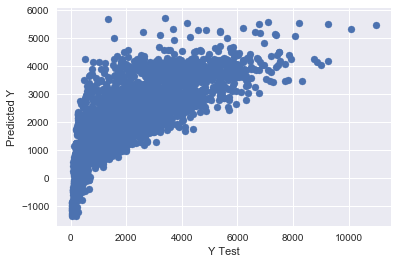

In [106]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [112]:
from sklearn import metrics 


In [113]:
MSE = metrics.mean_squared_error(y_test,pred)

In [116]:
RMSE = np.sqrt(MSE)
print (RMSE)

1102.08959283


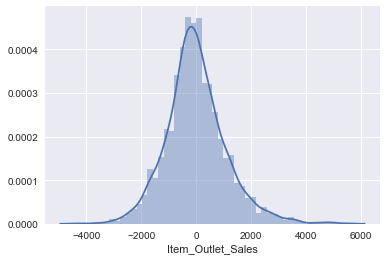

In [150]:
sns.distplot((y_test-pred),bins =50)